## Môn: Nhập môn máy học
 * Bài Thực hành: Lab05
 * Sinh viên: Huỳnh Thị Bảo Trân
 * MSSV: 19110482

# Lab 05: K-Mean Clustering

In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

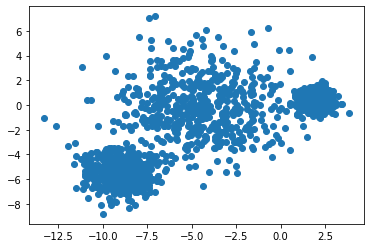

In [180]:
data = pd.read_csv('data.csv')
X = data[['x1', 'x2']].values

plt.scatter(X[:,0], X[:,1])

Sklearn

Sum of squared distances of samples to their closest cluster center: 5747.987366346273


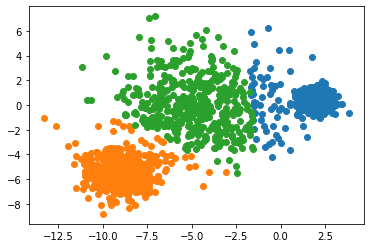

In [181]:
kmean = KMeans(n_clusters = 3).fit(X)
clusters = kmean.predict(X)
for ii in range(3):
  plt.scatter(X[:,0][clusters == ii], X[:, 1][clusters == ii])
print('Sum of squared distances of samples to their closest cluster center:', kmean.inertia_)

## Bài tập
- Hãy cài đặt lại KMeans Cluster Algorithm mô tả trong Lec05_Unsupervised_KMeans, slide 14 của thầy. Chủ yếu dùng numpy để tính toán nhé.
- Hãy lưu lại tổng within-cluster-variation của mọi clusters sau mỗi vòng lặp để vẽ hình.

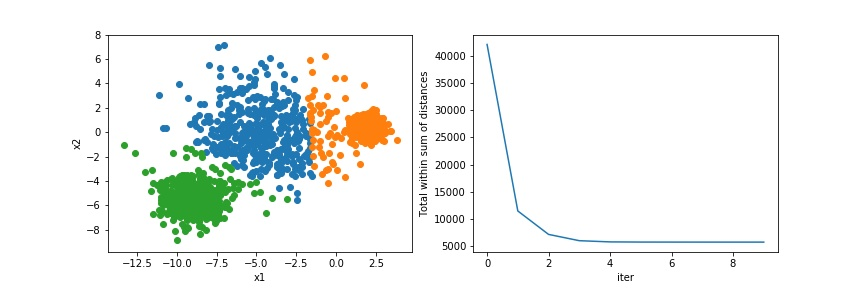

In [182]:
from IPython.display import display, Image
display(Image(filename = 'fig.jpg'))

In [183]:
import numpy as np
from scipy.spatial.distance import cdist

In [184]:
def kmeans(x, k):
  idx = np.random.choice(len(x), k, replace = False)
  centroids = x[idx, :]
  
  distances = cdist(x, centroids , 'euclidean')
  points = np.array([np.argmin(i) for i in distances])

  for _ in range(1000):
    centroids = []
    for idx in range(k):
      cent = x[points == idx].mean(axis = 0)
      centroids.append(cent)

    centroids = np.vstack(centroids)
    distances = cdist(x, centroids , 'euclidean')
    points = np.array([np.argmin(i) for i in distances])
  return points

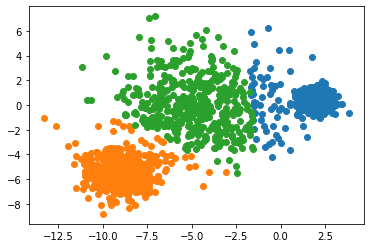

In [185]:
data = pd.read_csv('data.csv')
df = data.values
label = kmeans(df, 3)

for i in np.unique(label):
  plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.show()

In [189]:
def kmeansDis(x, k):
  KMean = [kmeans(x, k) for k in K]
  cent = [i for (i, var) in KMean] 
  dis = [cdist(x, i, 'euclidean') for i in cent]
  points = np.array([np.min(i, axis = 1) for i in dis])
  return [sum(i) for i in points]

K = range(1, 10)
withClusVari = kmeansDis(df, 3)

Text(0, 0.5, 'Total within sum of distances')

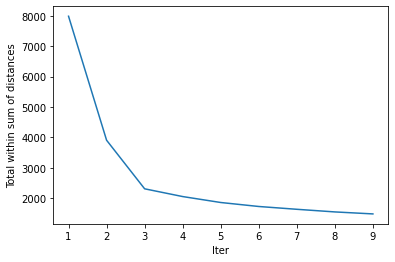

In [190]:
fig = plt.figure()
plt.plot(K, withClusVari)
plt.xlabel('Iter')
plt.ylabel('Total within sum of distances')